In [1]:
import matplotlib.pyplot as plt
import random
import numpy as np

import pandas as pd
from matplotlib.ticker import LogFormatter 
from scipy.optimize import curve_fit
from pathlib import Path
import matplotlib.colors
from matplotlib import ticker, cm
import pickle

from scipy.stats import norm
#%matplotlib notebook

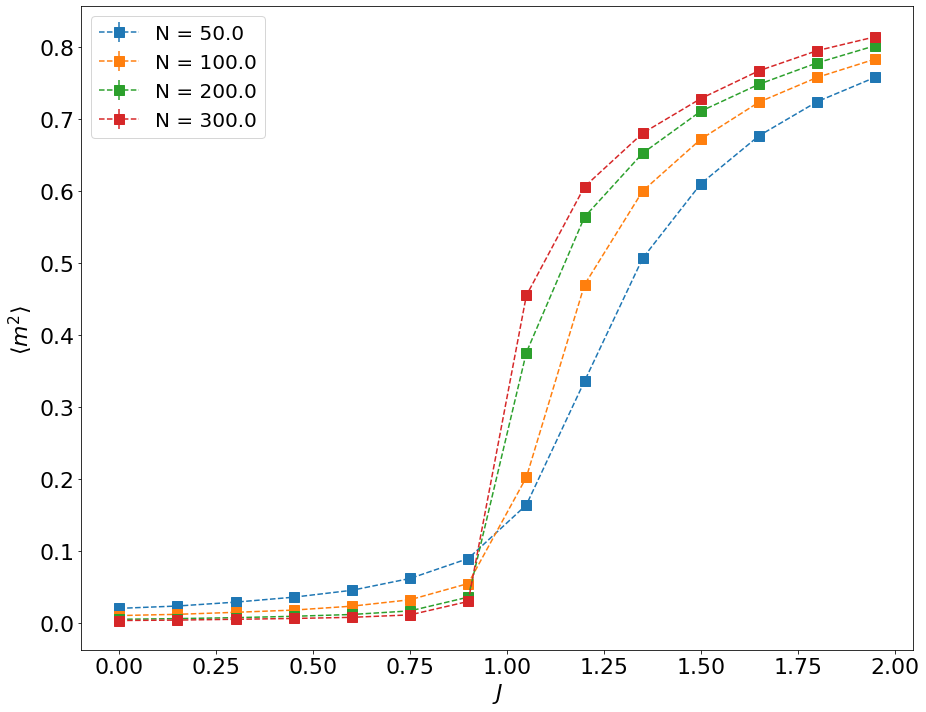

In [2]:
data_np = np.loadtxt("CPP_3D/Results/Iteration00/LongChains.txt", skiprows=0)
#data_np = np.loadtxt("CPP/LongChains1/LongChains.txt", skiprows=0)


lengths = np.unique(data_np[:, 0])
fig = plt.figure(figsize=(13, 10))
ax = fig.add_subplot(111)


for l in lengths:
   
    if l==10000: continue 
    data_l = data_np[data_np[:,0]==l]
    
    ind = np.argsort(data_l[:,1])
    data_l=data_l[ind]
    J_l = data_l[:, 1]
    
    bc = data_l[:,17]
    #print(1/bc)
    #print( (2/data_l[:,19])**0.5 )
    errs = data_l[:,18]
    #errs = (2*data_l[:,16] / data_l[:,15])**2 + (data_l[:,18] /data_l[:,17])
    #errs=np.sqrt(errs)*bc

    plt.errorbar(J_l, bc, yerr=errs, fmt="s--", ms = 10, label = "N = " + str(l))
 
#plt.plot([0.72, J_l[-1]], [2/3, 2/3], "-", label=r"$\nu=\frac{2}{3}$", c="b",lw=4, alpha=0.95)
 
plt.xlabel(r'$J$', fontsize = 22)
plt.ylabel(r"$ \langle m^2 \rangle $ ", fontsize=22)
plt.tick_params(axis='x', labelsize=22) 
plt.tick_params(axis='y', labelsize=22) 
#plt.ylim(-0.02, 0.7)

#plt.grid()

plt.legend(loc="best", fontsize=20)

plt.tight_layout()

plt.savefig("Thesis/Images/3_magnetization2_shortchains.png", bbox_inches='tight')

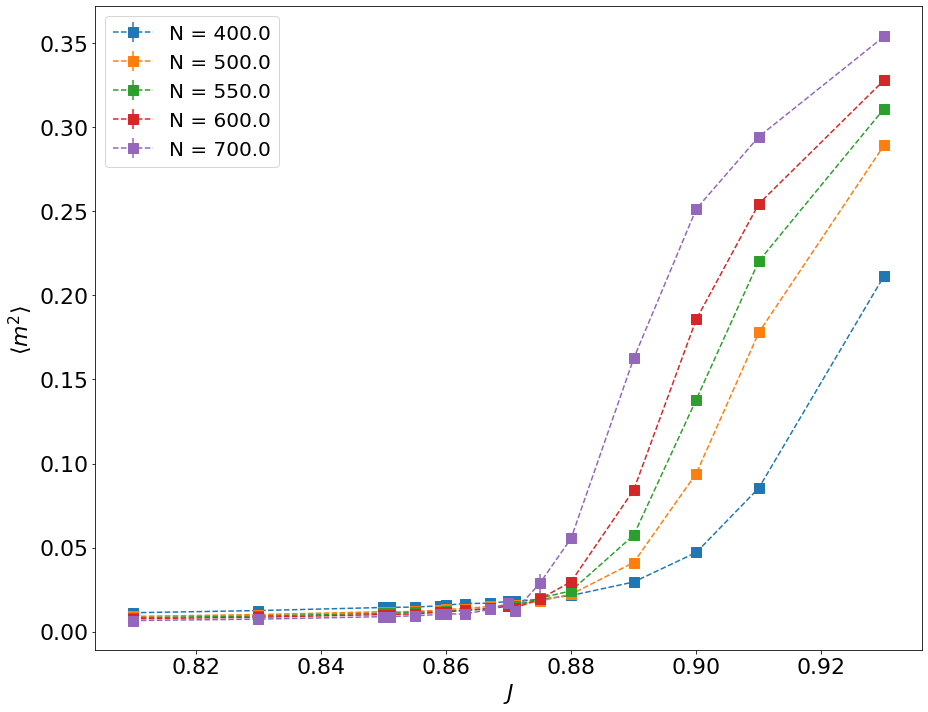

In [24]:
data_np = np.loadtxt("CPP_3D/Results/LongerIteration1/LongChains.txt", skiprows=0)
#data_np = np.loadtxt("CPP/LongChains1/LongChains.txt", skiprows=0)

lengths = np.unique(data_np[:, 0])
fig = plt.figure(figsize=(13, 10))
ax = fig.add_subplot(111)

for l in lengths:
   
    if l==10000: continue 
    data_l = data_np[data_np[:,0]==l]    
    ind = np.argsort(data_l[:,1])
    data_l=data_l[ind]
    J_l = data_l[:, 1]
    bc = data_l[:,17]
    errs = data_l[:,18]
    plt.errorbar(J_l, bc, yerr=errs, fmt="s--", ms = 10, label = "N = " + str(l))
 
plt.xlabel(r'$J$', fontsize = 22)
plt.ylabel(r"$ \langle m^2 \rangle $ ", fontsize=22)
plt.tick_params(axis='x', labelsize=22) 
plt.tick_params(axis='y', labelsize=22) 

plt.legend(loc="best", fontsize=20)

plt.tight_layout()

plt.savefig("Thesis/Images/3_magnetization2_longchains.png", bbox_inches='tight')

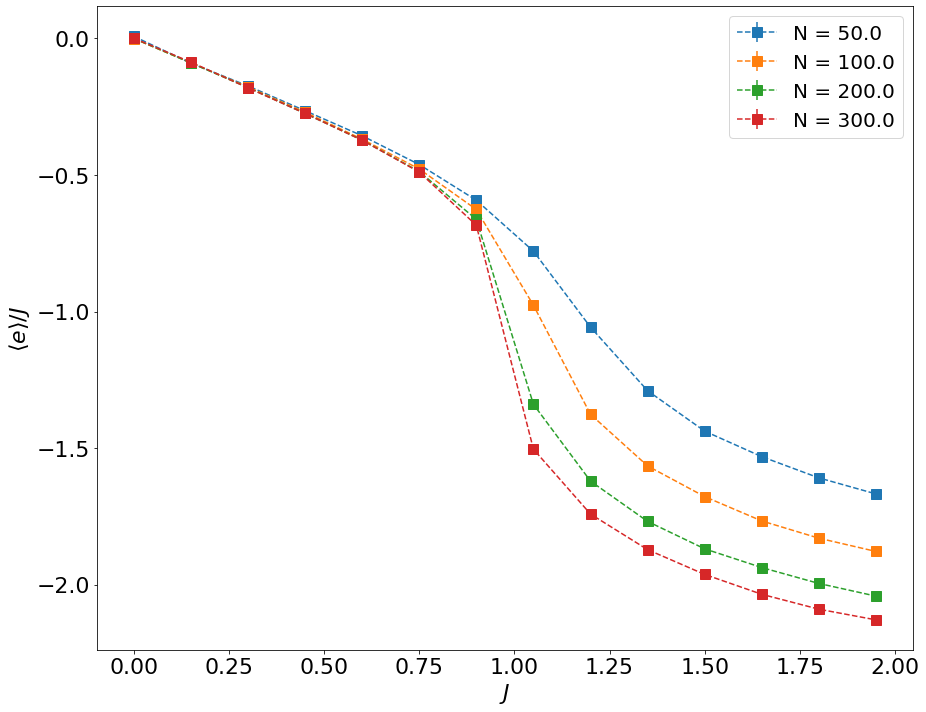

In [25]:
data_np = np.loadtxt("CPP_3D/Results/Iteration00/LongChains.txt", skiprows=0)

lengths = np.unique(data_np[:, 0])
fig = plt.figure(figsize=(13, 10))
ax = fig.add_subplot(111)


for l in lengths:
   
    if l==10000: continue 
    data_l = data_np[data_np[:,0]==l]
    
    ind = np.argsort(data_l[:,1])
    data_l=data_l[ind]
    J_l = data_l[:, 1]
    bc = data_l[:,7] 
    errs = data_l[:,8]
 

    plt.errorbar(J_l, bc, yerr=errs, fmt="s--", ms = 10, label = "N = " + str(l))
 
 
 
plt.xlabel(r'$J$', fontsize = 22)
plt.ylabel(r"$ \langle e \rangle / J $ ", fontsize=22)
plt.tick_params(axis='x', labelsize=22) 
plt.tick_params(axis='y', labelsize=22) 
#plt.ylim(-0.02, 0.7)

#plt.grid()

plt.legend(loc="best", fontsize=20)

plt.tight_layout()

plt.savefig("Thesis/Images/3_energy_shortchains.png", bbox_inches='tight')

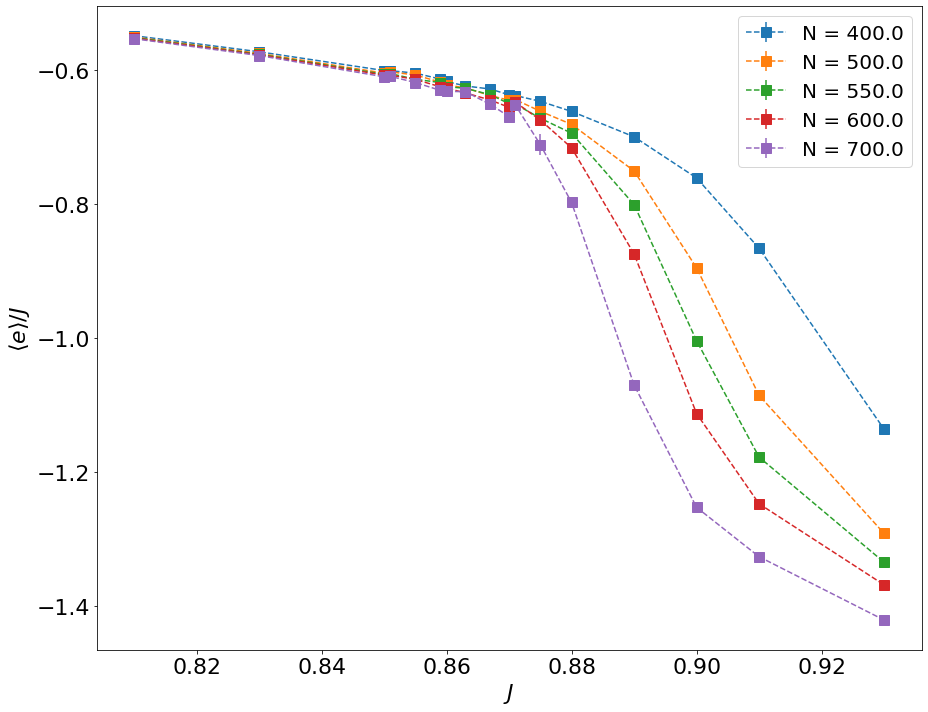

In [26]:
data_np = np.loadtxt("CPP_3D/Results/LongerIteration1/LongChains.txt", skiprows=0)

lengths = np.unique(data_np[:, 0])
fig = plt.figure(figsize=(13, 10))
ax = fig.add_subplot(111)


for l in lengths:
   
    if l==10000: continue 
    data_l = data_np[data_np[:,0]==l]
    
    ind = np.argsort(data_l[:,1])
    data_l=data_l[ind]
    J_l = data_l[:, 1]
    bc = data_l[:,7] 
    errs = data_l[:,8]
 

    plt.errorbar(J_l, bc, yerr=errs, fmt="s--", ms = 10, label = "N = " + str(l))
 
 
 
plt.xlabel(r'$J$', fontsize = 22)
plt.ylabel(r"$ \langle e \rangle / J $ ", fontsize=22)
plt.tick_params(axis='x', labelsize=22) 
plt.tick_params(axis='y', labelsize=22) 
#plt.ylim(-0.02, 0.7)

#plt.grid()

plt.legend(loc="best", fontsize=20)

plt.tight_layout()

plt.savefig("Thesis/Images/3_energy_longchains.png", bbox_inches='tight')

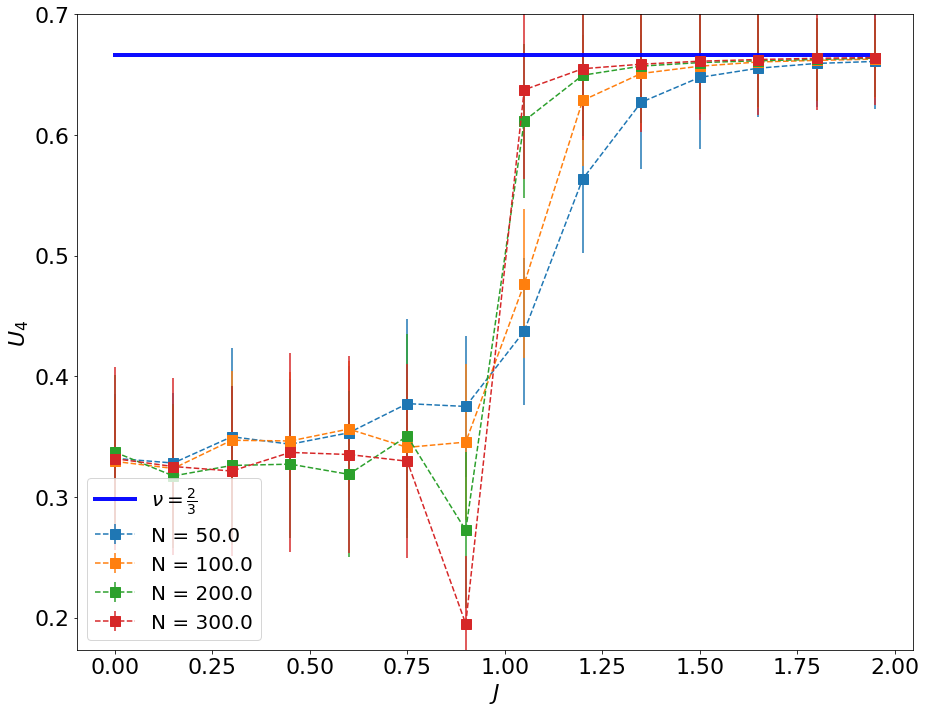

In [3]:
data_np = np.loadtxt("CPP_3D/Results/Iteration00/LongChains.txt", skiprows=0)

lengths = np.unique(data_np[:, 0])
fig = plt.figure(figsize=(13, 10))
ax = fig.add_subplot(111)


for l in lengths:
    if l==10000: continue
        
    #if l==1000: continue
        
    data_l = data_np[data_np[:,0]==l]
    
    ind = np.argsort(data_l[:,1])
    data_l=data_l[ind]    
    
    
    J_l = data_l[:, 1]
    
    #print(bc)
    #print(data_l[:,17])
    
    bc = 1 - data_l[:,19]/3/data_l[:,17]/data_l[:,17]
    #print(bc)
  
    errs = (2*data_l[:,18] / data_l[:,17])**2 + (data_l[:,20] /data_l[:,19])
    errs=np.sqrt(errs)*bc

    plt.errorbar(J_l, bc, yerr=errs, fmt="s--", ms = 10, label = "N = " + str(l))
 
plt.plot([J_l[0], J_l[-1]], [2/3, 2/3], "-", label=r"$\nu=\frac{2}{3}$", c="b",lw=4, alpha=0.95)
 
plt.xlabel(r'$J$', fontsize = 22)
plt.ylabel(r"$ U_4 $ ", fontsize=22)
plt.tick_params(axis='x', labelsize=22) 
plt.tick_params(axis='y', labelsize=22) 
plt.ylim(1/3 -0.16, 0.7)

plt.legend(loc="best", fontsize=20) 

plt.tight_layout()

plt.savefig("Thesis/Images/3_bindercumulants_shortchains.png", bbox_inches='tight')

[0.61440147 0.6110408  0.60029187 0.60833354 0.59574342 0.58818727
 0.52022783 0.00406976 0.03402404 0.10940057 0.18717103 0.21209217
 0.22467803 0.23503637] [0.00485427 0.00617886 0.00158846 0.0029877  0.00145281 0.00434725
 0.0026102  0.07369889 0.04019751 0.03381297 0.02749282 0.01293138
 0.0157585  0.01350493]


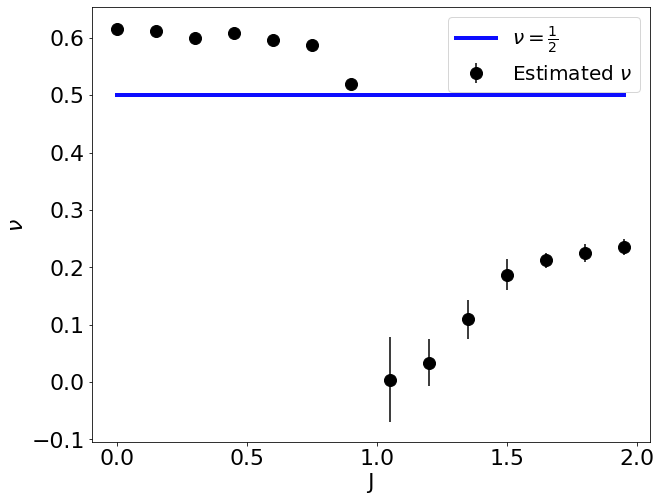

In [23]:
def r_on_n(n, nu, b):
    return 2*nu*n+b
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111)

data_np = np.loadtxt("CPP_3D/Results/Iteration00/LongChains.txt", skiprows=0)
J_l = np.unique(data_np[:, 1])


k1=1
k2=1

e=len(J_l)
v = np.zeros(e)
sigmas = np.zeros(e)

i=0
for J in J_l :
    data_l = data_np[data_np[:,1]==J]
    #data_l = data_l[data_l[:,0]>99]
    #data_l = data_l[data_l[:,0]>99]
    #print(data_l)
    n_saw = data_l[:, 0]
    
    mean_r = data_l[:,3]
    err_r = data_l[:,4] 
    popt, pcov = curve_fit(r_on_n, np.log(n_saw+k2), np.log(mean_r+k1), sigma=err_r )  
    v[i] = popt[0]
    perr = np.sqrt(np.diag(pcov))

    
    perr = np.sqrt(np.diag(pcov))
    sigmas[i] =perr[0]
    i+=1
    
    
plt.errorbar( J_l, v , yerr=sigmas, fmt="o", ms = 12,c="k", label = r"Estimated $\nu$")


plt.plot([J_l[0], J_l[-1]], [1/2, 1/2], "-", label=r"$\nu=\frac{1}{2}$", c="b",lw=4, alpha=0.95)

plt.xlabel(r'J', fontsize = 22)
plt.ylabel(r"$\nu$ ", fontsize=22)
plt.tick_params(axis='x', labelsize=22) 
plt.tick_params(axis='y', labelsize=22) 
#ax.set_xticks(np.arange(0, 1, 0.1))

theta = 1.0/1.18
print(v, sigmas)
#plt.plot([theta], [4.0/7.0], "*", c= "purple", ms=15)

plt.legend(loc="best", fontsize=20)
plt.savefig("Thesis/Images/3_nu_shortchains.png", bbox_inches='tight')    

[ 0.56337483  0.559309    0.5373056   0.58886018  0.5335723   0.5336224
  0.521977    0.61776472  0.57501623  0.50035523  0.54286114  0.51405896
  0.41800222  0.21126322 -0.6138681  -0.8852332  -0.37499331] [0.00183128 0.00100237 0.00135871 0.0159309  0.01745013 0.01845336
 0.00268256 0.01956223 0.012065   0.00538617 0.02105184 0.02094818
 0.01668592 0.07074272 0.14480115 0.05587763 0.11499962]


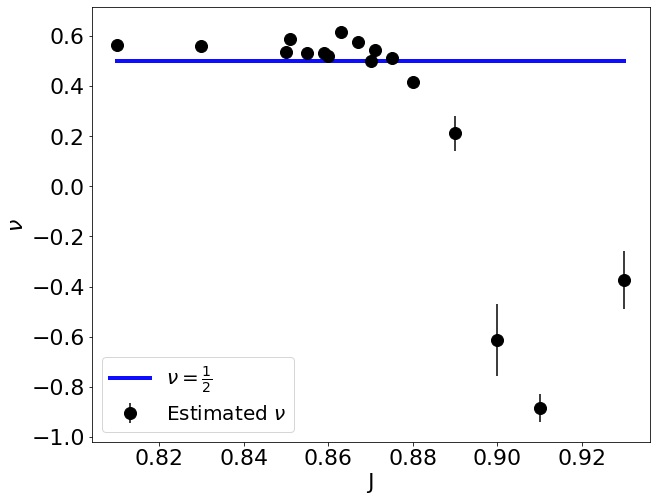

In [27]:
def r_on_n(n, nu, b):
    return 2*nu*n+b
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111)

data_np = np.loadtxt("CPP_3D/Results/LongerIteration1/LongChains.txt", skiprows=0)
J_l = np.unique(data_np[:, 1])


k1=1
k2=1

e=len(J_l)
v = np.zeros(e)
sigmas = np.zeros(e)

i=0
for J in J_l :
    data_l = data_np[data_np[:,1]==J]
    n_saw = data_l[:, 0]
    
    mean_r = data_l[:,3]
    err_r = data_l[:,6] 
    popt, pcov = curve_fit(r_on_n, np.log(n_saw+k2), np.log(mean_r+k1), sigma=err_r )  
    v[i] = popt[0]
    perr = np.sqrt(np.diag(pcov))

    
    perr = np.sqrt(np.diag(pcov))
    sigmas[i] =perr[0]
    i+=1
    
 
plt.errorbar( J_l, v , yerr=sigmas, fmt="o", ms = 12,c="k", label = r"Estimated $\nu$")


plt.plot([J_l[0], J_l[-1]], [1/2, 1/2], "-", label=r"$\nu=\frac{1}{2}$", c="b",lw=4, alpha=0.95)

plt.xlabel(r'J', fontsize = 22)
plt.ylabel(r"$\nu$ ", fontsize=22)
plt.tick_params(axis='x', labelsize=22) 
plt.tick_params(axis='y', labelsize=22) 
#ax.set_xticks(np.arange(0, 1, 0.1))

theta = 1.0/1.18
print(v, sigmas)
#plt.plot([theta], [4.0/7.0], "*", c= "purple", ms=15)

plt.legend(loc="best", fontsize=20)
plt.savefig("Thesis/Images/3_nu_shortchains_deep.png", bbox_inches='tight')    

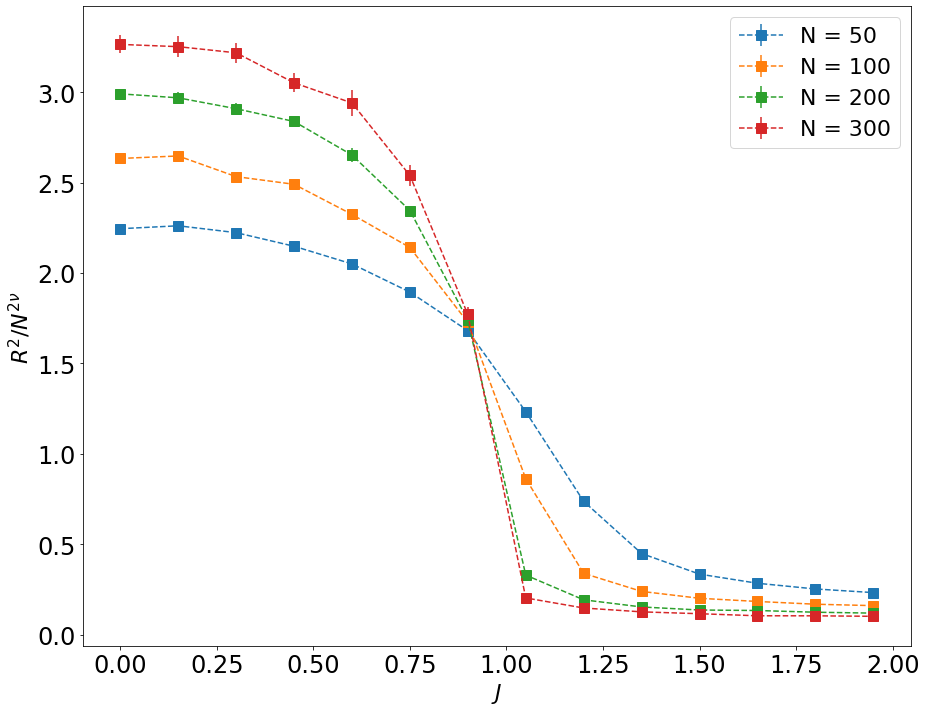

In [6]:


data_np = np.loadtxt("CPP_3D/Results/Iteration00/LongChains.txt", skiprows=0)


lengths = np.unique(data_np[:, 0])
fig = plt.figure(figsize=(13, 10))
ax = fig.add_subplot(111)

nu=1/2

for l in lengths:
    if (l==10000):
        continue
    data_l = data_np[data_np[:,0]==l]
    
    ind = np.argsort(data_l[:,1])
    data_l=data_l[ind]
    J_l = data_l[:, 1]
    r_l = data_l[:, 3]
    
    bc = r_l/np.power(l, 2*nu)
 
    errs = data_l[:, 4]/np.power(l, 2*nu)

    plt.errorbar(J_l, bc, yerr=errs, fmt="s--", ms = 10, label = "N = " + str(int(l)))
 
 
plt.xlabel(r'$J$', fontsize = 22)
plt.ylabel(r"$ R^2/N^{2 \nu} $ ", fontsize=22)
plt.tick_params(axis='x', labelsize=24) 
plt.tick_params(axis='y', labelsize=24) 
#plt.xlim(1.25, 1.45)
#plt.ylim(0.1, 4.5)

plt.legend(fontsize=22)

#plt.grid()
plt.tight_layout()
#plt.savefig("/home/kamilla/Lattice_models/img/rscaling.png")
plt.savefig("Thesis/Images/3_rscaling_shortchains.png", bbox_inches='tight')

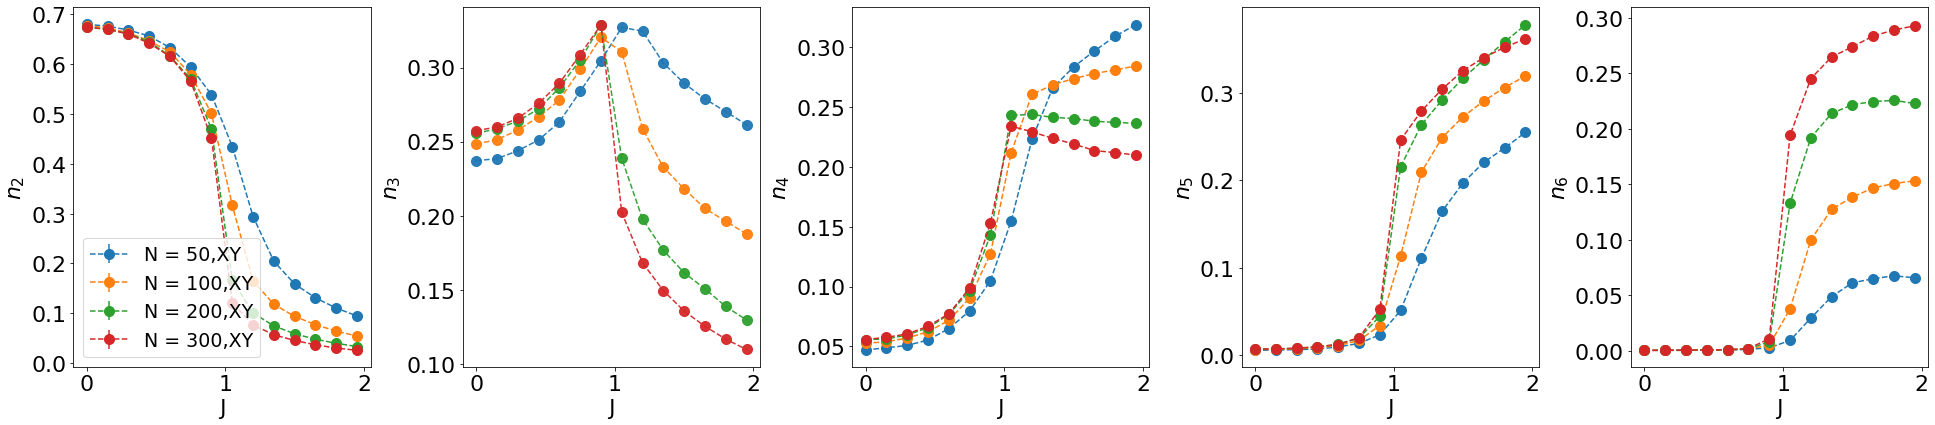

In [7]:
fig, axes = plt.subplots(1, 5, figsize=(27,6)) #,  sharey='row')
axes = axes.reshape(-1)

data_np = np.loadtxt("CPP_3D/Results/Iteration00/LongChains.txt", skiprows=0)


y= np.argsort(data_np[:, 1],kind='mergesort')
data_np=data_np[y]

lengths = np.unique(data_np[:, 0])


for l in lengths:

    #if (l==100 or l ==400): continue
    data_l = data_np[data_np[:,0]==l]
    J_l = data_l[:, 1]

    axes[0].errorbar(J_l, data_l[:,22], yerr=data_l[:,23], fmt="o--", ms = 10, label = "N = " + str(int(l)) + ",XY")
    axes[1].errorbar(J_l, data_l[:,24], yerr=data_l[:,25], alpha = 0.95, fmt="o--", ms = 10, label = "N = " + str(int(l)) + ",XY")
    axes[2].errorbar(J_l, data_l[:,26], yerr=data_l[:,27], fmt="o--", ms = 10, label = "N = " + str(int(l)) + ",CY")
    
    axes[3].errorbar(J_l, data_l[:,28], yerr=data_l[:,29], fmt="o--", ms = 10, label = "N = " + str(int(l)) + ",CY")
    axes[4].errorbar(J_l, data_l[:,30], yerr=data_l[:,31], fmt="o--", ms = 10, label = "N = " + str(int(l)) + ",CY")
    
     
axes[0].set_ylabel(r'$n_2$', fontsize=22)    
axes[1].set_ylabel(r'$n_3$', fontsize=22)    
axes[2].set_ylabel(r'$n_4$', fontsize=22)  
axes[3].set_ylabel(r'$n_5$', fontsize=22)  
axes[4].set_ylabel(r'$n_6$', fontsize=22)  

axes[0].legend(fontsize = 19)
#axes[1].legend(fontsize = 10)
#axes[2].legend(fontsize = 11)


for i in range(5):
    axes[i].set_xlabel("J", fontsize=22)
    axes[i].tick_params(axis='x', labelsize=22) 
    axes[i].tick_params(axis='y', labelsize=22) 
    
    
plt.tight_layout()

plt.savefig("Thesis/Images/3_bulk_shortchains.png", bbox_inches='tight')

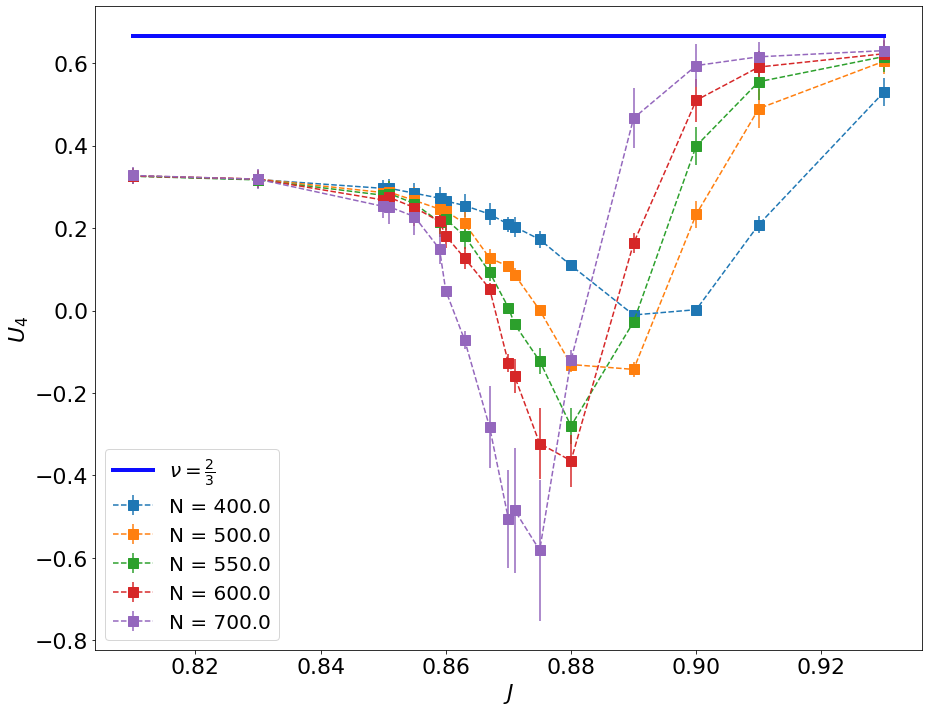

In [5]:
data_np = np.loadtxt("CPP_3D/Results/LongerIteration1/LongChains.txt", skiprows=0)

lengths = np.unique(data_np[:, 0])
fig = plt.figure(figsize=(13, 10))
ax = fig.add_subplot(111)


for l in lengths:
    if l==10000: continue
        
    #if l==1000: continue
        
    data_l = data_np[data_np[:,0]==l]
    
    ind = np.argsort(data_l[:,1])
    data_l=data_l[ind]    
    
    
    J_l = data_l[:, 1]
    
    #print(bc)
    #print(data_l[:,17])
    
    bc = 1 - data_l[:,19]/3/data_l[:,17]/data_l[:,17]
    #print(bc)
  
    errs = (2*data_l[:,18] / data_l[:,17])**2 + (data_l[:,20] /data_l[:,19])
    errs=np.sqrt(errs)*bc

    plt.errorbar(J_l, bc, yerr=errs, fmt="s--", ms = 10, label = "N = " + str(l))
 
plt.plot([J_l[0], J_l[-1]], [2/3, 2/3], "-", label=r"$\nu=\frac{2}{3}$", c="b",lw=4, alpha=0.95)
 
plt.xlabel(r'$J$', fontsize = 22)
plt.ylabel(r"$ U_4 $ ", fontsize=22)
plt.tick_params(axis='x', labelsize=22) 
plt.tick_params(axis='y', labelsize=22) 
#plt.ylim(1/3 -0.16, 0.7)



plt.legend(loc="best", fontsize=20)
 
 

plt.tight_layout()

plt.savefig("Thesis/Images/3_bindercumulants_longchains.png", bbox_inches='tight')

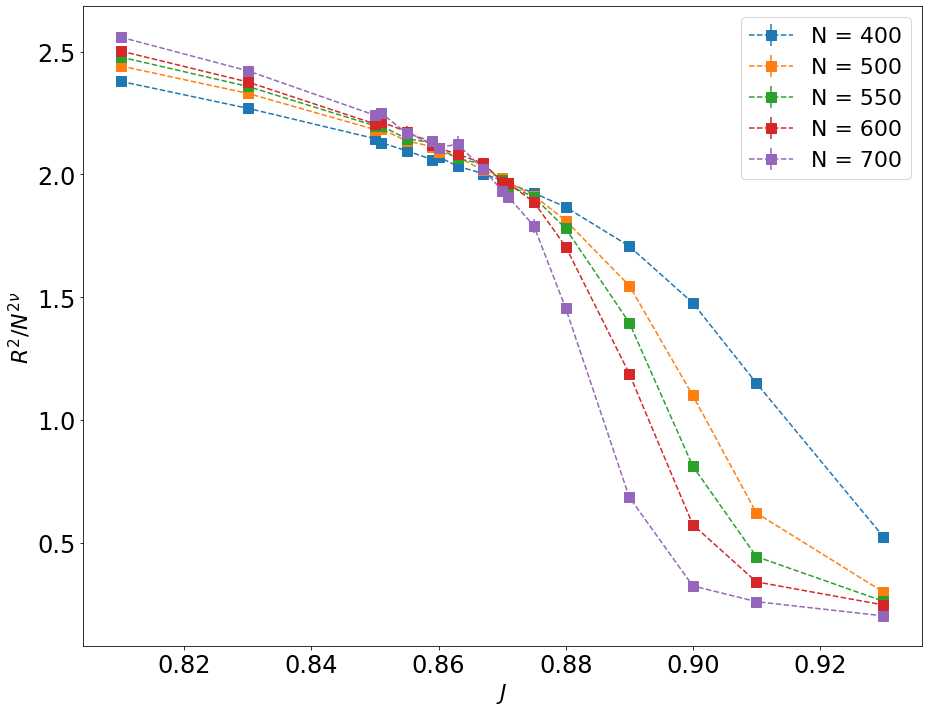

In [4]:
data_np = np.loadtxt("CPP_3D/Results/LongerIteration1/LongChains.txt", skiprows=0)

lengths = np.unique(data_np[:, 0])
fig = plt.figure(figsize=(13, 10))
ax = fig.add_subplot(111)

nu=1/2

for l in lengths:
    if (l==10000):
        continue
    data_l = data_np[data_np[:,0]==l]
    
    ind = np.argsort(data_l[:,1])
    data_l=data_l[ind]
    J_l = data_l[:, 1]
    r_l = data_l[:, 3]
    
    bc = r_l/np.power(l, 2*nu)
 
    errs = data_l[:, 4]/np.power(l, 2*nu)

    plt.errorbar(J_l, bc, yerr=errs, fmt="s--", ms = 10, label = "N = " + str(int(l)))
 
 
plt.xlabel(r'$J$', fontsize = 22)
plt.ylabel(r"$ R^2/N^{2 \nu} $ ", fontsize=22)
plt.tick_params(axis='x', labelsize=24) 
plt.tick_params(axis='y', labelsize=24) 
#plt.xlim(1.25, 1.45)
#plt.ylim(0.1, 4.5)

plt.legend(fontsize=22)

#plt.grid()
plt.tight_layout()
#plt.savefig("/home/kamilla/Lattice_models/img/rscaling.png")
plt.savefig("Thesis/Images/3_rscaling_longchains.png", bbox_inches='tight')

In [5]:
J_l

array([0.81, 0.83, 0.85, 0.86, 0.87, 0.88, 0.89, 0.9 , 0.91, 0.93])

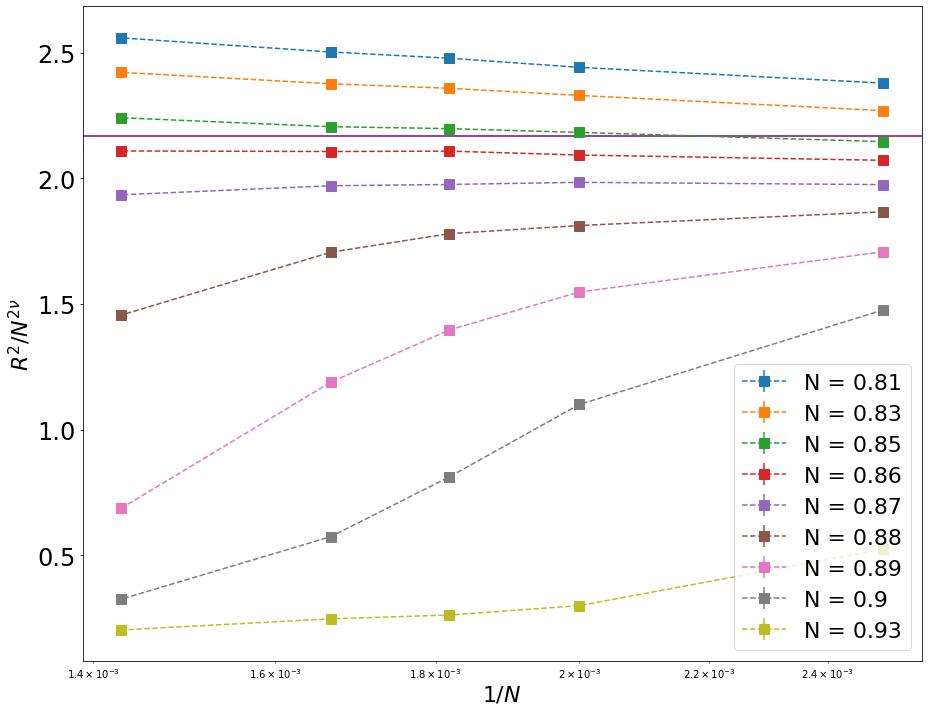

In [3]:
data_np = np.loadtxt("CPP_3D/Results/LongerIteration1/LongChains.txt", skiprows=0)

y= np.argsort(data_np[:, 1],kind='mergesort')
data_np=data_np[y]
lengths = np.unique(data_np[:, 1])
fig = plt.figure(figsize=(13, 10))
ax = fig.add_subplot(111)

nu=1/2

 
lengths = [0.81,0.83, 0.85, 0.86, 0.87, 0.88, 0.89, 0.9, 0.93 ]
for l in lengths:
    #if l<900: continue
    #if (l==4900 or l==36000 or l==25000): continue
    data_l = data_np[data_np[:,1]==l]
    
    ind = np.argsort(data_l[:,0])
    data_l=data_l[ind]
    J_l = data_l[:, 0]
    #print(J_l)
    r_l = data_l[:, 3]
    
    bc = r_l/np.power( data_l[:, 0], 2*nu)
 
    errs = data_l[:, 4]/np.power( data_l[:, 0], 2*nu)

    plt.errorbar(1/J_l, bc, yerr=errs, fmt="s--", ms = 10, label = "N = " + str((l)))
 


plt.axhline(2.17, c ="purple") 

plt.xlabel(r'$1/N $', fontsize = 22)
plt.ylabel(r"$ R ^2/N^{ 2\nu} $ ", fontsize=22)
plt.tick_params(axis='x', labelsize=24) 
plt.tick_params(axis='y', labelsize=24) 
#plt.xlim(1.26, 1.45)
#plt.ylim(0.05, 0.60795)
 
#plt.xlim(left = 1.255, right=1.355)
plt.legend(fontsize=22)

plt.xscale("log")
#plt.grid()
plt.tight_layout()
#plt.savefig("/home/kamilla/Lattice_models/img/rscaling.png")
plt.savefig("Thesis/Images/rscaling_longchainscross_3D.png", bbox_inches='tight')